# Exploring training data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5,correct_option_number
0,Optimization of actions and planning,Maria needs to prepare for a party and has lim...,Maria should first prepare the cake and put it...,"Bake the cake, decorate the living room, pick ...","Decorate the living room, bake the cake, pick ...","Pick up friend, bake the cake, decorate the li...","Bake the cake, decorate the living room, pick ...",Another answer,4
1,Spatial reasoning,"In a room, there are 4 corners: A, B, C, and D...",The only point in a square room that is equidi...,At the center of the room,Halfway between corner A and the center of the...,At corner A,"Nowhere, because it's a logical trap",Another answer,4
2,Spatial reasoning,"Imagine that you are in a room with 4 walls, e...","To solve this spatial reasoning puzzle, you mu...","Right, Forward, Left","Right, Left, Forward","Forward, Left, Right","Left, Right, Forward",Another answer,5
3,Optimization of actions and planning,"Laura is planning to visit three cities: A, B,...",The shortest route Laura can take is to start ...,A-B-C-A,A-C-B-A,B-A-C-B,C-A-B-C,Another answer,2
4,Operation of mechanisms,"In a room, there are three machines controlled...",Start by flipping Switch 1 and wait for a coup...,Flip all switches and immediately check the ma...,Flip each switch one by one and enter the room...,"Flip Switch 1, wait, flip it back, flip Switch...",Leave all switches off and guess the correspon...,Another answer,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   topic                  384 non-null    object
 1   problem_statement      384 non-null    object
 2   solution               384 non-null    object
 3   answer_option_1        384 non-null    object
 4   answer_option_2        384 non-null    object
 5   answer_option_3        384 non-null    object
 6   answer_option_4        382 non-null    object
 7   answer_option_5        384 non-null    object
 8   correct_option_number  384 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 27.1+ KB


In [4]:
df.isna().sum()

topic                    0
problem_statement        0
solution                 0
answer_option_1          0
answer_option_2          0
answer_option_3          0
answer_option_4          2
answer_option_5          0
correct_option_number    0
dtype: int64

In [5]:
missing_rows = df[df['answer_option_4'].isna()]
for ps in missing_rows['problem_statement']:
    print('PS WITH MISSING VALUE :\n', ps, end  = '\n\n')
missing_rows

PS WITH MISSING VALUE :
 In a machine, there are three levers: A, B, and C. Each lever can be in an up (U) or down (D) position. The machine is turned on if a specific rule of positions of levers is met. The following observations were made: 
1. When lever A was in the up position, and levers B and C in the down position, the machine was off. 
2. With levers A and B in the up position and lever C in the down position, the machine was on. 
3. When lever B was up and levers A and C were down, the machine was off. 
4. With all levers in the down position, the machine was off. 
What must be the position of levers A, B, and C for the machine to turn on?

PS WITH MISSING VALUE :
 Alice, Bob, and Charlie are three siblings. Alice says, 'At least one of us is a liar.' Bob says, 'Exactly two of us are liars.' Charlie states, 'All three of us are liars.' Assuming that liars always lie and those who tell the truth always tell the truth, how many of them are lying?



,topic,problem_statement,solution,answer_option_1,answer_option_2,answer_option_3,answer_option_4,answer_option_5,correct_option_number
55,Operation of mechanisms,"In a machine, there are three levers: A, B, an...",Assuming the machine turns on only when a spec...,"A: U, B: U, C: U","A: U, B: U, C: D","A: D, B: U, C: U",NaN,Another answer,2
126,Logical traps,"Alice, Bob, and Charlie are three siblings. Al...","If Alice were lying, then none of the siblings...",One,Two,Three,NaN,Another answer,2


### Missing values are not of great concern as they are in option and one of them is self explanable and other can be ignored and dealt later.

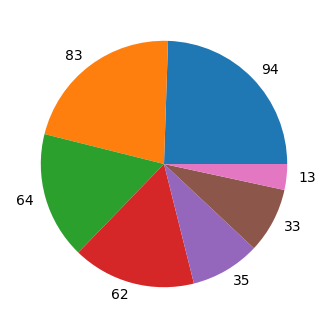

topic
Spatial reasoning                       94
Optimization of actions and planning    83
Operation of mechanisms                 64
Sequence solving                        62
Lateral thinking                        35
Classic riddles                         33
Logical traps                           13
Name: count, dtype: int64

In [13]:
# Exploring topic
topic_counts = df['topic'].value_counts()
plt.figure(figsize = (4, 4))
plt.pie(topic_counts, labels = topic_counts)
plt.show()
topic_counts

## There are 7 categories hence initial thought is to think in direction of making tools for individual category